In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


## Least Square Line Fitting

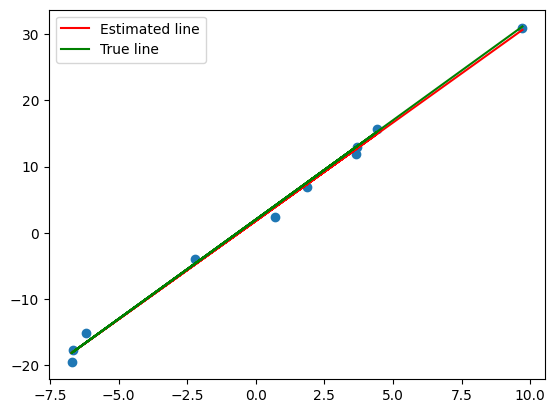

In [18]:
# Least-Squares Line Fitting

m, b = 3, 2
n = 10

x = np.linspace(0, 10, n)
x = 10*np.random.randn(len(x)) # Noise
y = m*x + b + np.random.normal(0, 1, n)

#y[-1] = 5

X = np.vstack((x, np.ones(n))).T
B = np.linalg.inv(X.T @ X) @ X.T @ y

m_est = B[0]
b_est = B[1]

plt.plot(x, y, 'o')
plt.plot(x, m_est*x + b_est, color='red', label='Estimated line')
plt.plot(x, m*x + b, color='green', label='True line')
plt.legend()
plt.show()


## Effect of outlier

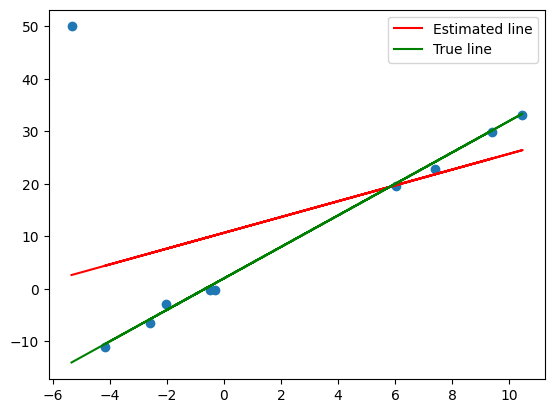

In [19]:
# Least-Squares Line Fitting

m, b = 3, 2
n = 10

x = np.linspace(0, 10, n)
x = 10*np.random.randn(len(x)) # Noise
y = m*x + b + np.random.normal(0, 1, n)
y[-1] = 50

X = np.vstack((x, np.ones(n))).T
B = np.linalg.inv(X.T @ X) @ X.T @ y

m_est = B[0]
b_est = B[1]

plt.plot(x, y, 'o')
plt.plot(x, m_est*x + b_est, color='red', label='Estimated line')
plt.plot(x, m*x + b, color='green', label='True line')
plt.legend()
plt.show()


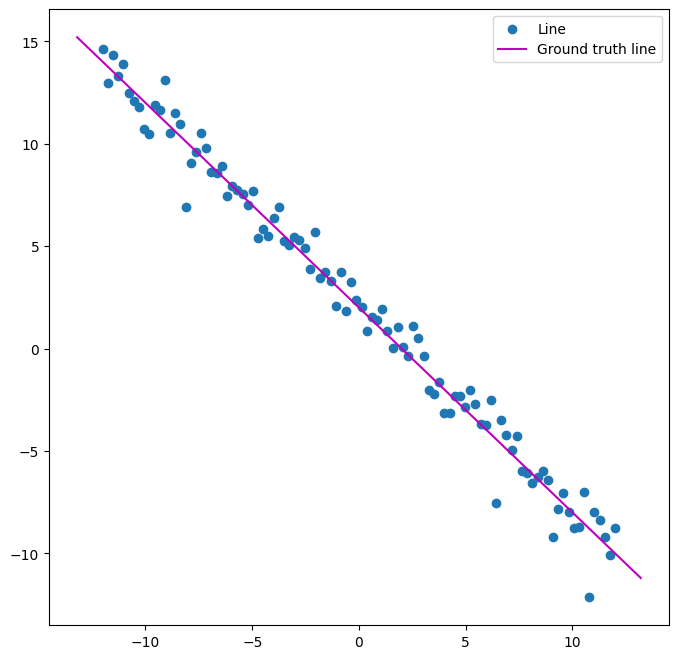

In [20]:
# Generation of a Noisy Point Set Conforming to a Line and a Circle
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)
N = 100
s = 1
m, c = -1, 2
x = np.linspace(-12, 12, N)
y = m*x + c + s*np.random.randn(N)
X_line = np.hstack((x.reshape(N, 1), y.reshape(N, 1)))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
x_min, x_max = ax.get_xlim()
X_ = np.array([x_min, x_max])
y_ = m*X_ + c
plt.plot(X_, y_, color='m', label='Ground truth line')
plt.legend()


Best line model: [0.70859219 0.70561824 1.44235523]


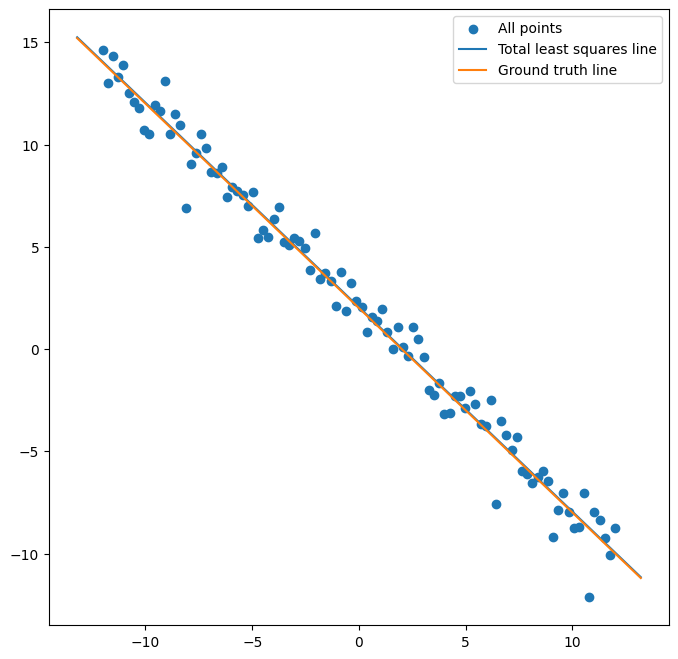

In [29]:
# Item 2: Line fitting with Total Least Squares
import math
N = X_line.shape[0]
x = X_line

U = x - np.mean(x, axis=0)

# Eigenvector of U^TU associated with the smallest eigenvalue
_, _, Vt = np.linalg.svd(np.transpose(U)@U)
a, b = Vt[-1, 0], Vt[-1, 1]
d = a*np.mean(x[:, 0]) + b*np.mean(x[:, 1])
best_model_line = np.array([a, b, d])

print('Best line model:', best_model_line)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='All points')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_, label='Total least squares line')
y_ = m*x_ + c
plt.plot(x_, y_, label='Ground truth line')
plt.legend()
